## Analyzing Movie Ratings

This is the first R project in part 5 of the Data quest R course. The main goal of this project is we to extract data from the top 30 movies between March and July 2020, by extracting various details, including a movie's title, description, actors, director, genre, runtime, and ratings.

Then, check whether ratings correlate to user votes. For instance, do the highest-rated movies also have the highest user vote scores?

In [ ]:
# loading the needed libraries and loading the webpage
library(rvest)
library(dplyr)
library(ggplot2)

url <- "http://dataquestio.github.io/web-scraping-pages/IMDb-DQgp.html"
wp_content <- read_html(url)

In [ ]:
# Extracting the movie titles
titles <- wp_content %>%
  html_nodes(".lister-item-header a") %>%
  html_text()
titles

[1] "Mulan"                                          
 [2] "The Call"                                       
 [3] "Greenland"                                      
 [4] "Don't Listen"                                   
 [5] "Unhinged"                                       
 [6] "Ava"                                            
 [7] "The Hunt"                                       
 [8] "Ghosts of War"                                  
 [9] "Hamilton"                                       
[10] "The Old Guard"                                  
[11] "The Secret: Dare to Dream"                      
[12] "The Outpost"                                    
[13] "Extraction"                                     
[14] "Train to Busan Presents: Peninsula"             
[15] "Greyhound"                                      
[16] "The King of Staten Island"                      
[17] "A Quiet Place Part II"                          
[18] "Bloodshot"                                      
[19] "The Dark and the Wicked"                        
[20] "Arkansas"                                       
[21] "The Rental"                                     
[22] "Trolls World Tour"                              
[23] "Sputnik"                                        
[24] "Eurovision Song Contest: The Story of Fire Saga"
[25] "Inheritance"                                    
[26] "Spenser Confidential"                           
[27] "The Tax Collector"                              
[28] "The Way Back"                                   
[29] "The Silencing"                                  
[30] "Archive"

In [ ]:
# Extracting the movie years
years <- wp_content %>%
  html_nodes(".lister-item-year") %>%
  html_text()
years

[1] "(2020)"      "(2020)"      "(2020)"      "(2020)"      "(2020)"     
 [6] "(IV) (2020)" "(II) (2020)" "(2020)"      "(2020)"      "(2020)"     
[11] "(2020)"      "(2020)"      "(2020)"      "(2020)"      "(2020)"     
[16] "(2020)"      "(2020)"      "(2020)"      "(2020)"      "(2020)"     
[21] "(2020)"      "(2020)"      "(2020)"      "(2020)"      "(I) (2020)" 
[26] "(2020)"      "(2020)"      "(2020)"      "(2020)"      "(2020)"

In [ ]:
# Converting the years from character to numeric data type
years <- readr::parse_number(years)
years

[1] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020
[16] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020

In [ ]:
# Extracting the movie runtime
runtimes <- wp_content %>%
  html_nodes(".text-muted .runtime") %>% # if this is a problem simply do .runtime only
  html_text()
runtimes

[1] "115 min" "112 min" "119 min" "97 min"  "90 min"  "96 min"  "90 min" 
 [8] "94 min"  "160 min" "125 min" "107 min" "123 min" "116 min" "116 min"
[15] "91 min"  "136 min" "97 min"  "109 min" "95 min"  "117 min" "88 min" 
[22] "90 min"  "113 min" "123 min" "111 min" "111 min" "95 min"  "108 min"
[29] "93 min"  "109 min"

In [ ]:
# Converting the runtimes from character to numeric data type
runtimes <- readr::parse_number(runtimes)
runtimes

[1] 115 112 119  97  90  96  90  94 160 125 107 123 116 116  91 136  97 109  95
[20] 117  88  90 113 123 111 111  95 108  93 109

In [ ]:
# Extracting the movie genre
genres <- wp_content %>%
  html_nodes(".text-muted .genre") %>%
  html_text()
genres

[1] "\nAction, Adventure, Drama            "    
 [2] "\nHorror, Mystery, Thriller            "   
 [3] "\nAction, Drama, Thriller            "     
 [4] "\nDrama, Horror, Thriller            "     
 [5] "\nAction, Thriller            "            
 [6] "\nAction, Crime, Drama            "        
 [7] "\nAction, Horror, Thriller            "    
 [8] "\nHorror, Thriller, War            "       
 [9] "\nBiography, Drama, History            "   
[10] "\nAction, Adventure, Fantasy            "  
[11] "\nDrama, Romance            "              
[12] "\nAction, Drama, History            "      
[13] "\nAction, Thriller            "            
[14] "\nAction, Horror, Thriller            "    
[15] "\nAction, Drama, History            "      
[16] "\nComedy, Drama            "               
[17] "\nDrama, Horror, Sci-Fi            "       
[18] "\nAction, Drama, Sci-Fi            "       
[19] "\nHorror            "                      
[20] "\nCrime, Drama, Thriller            "      
[21] "\nHorror, Thriller            "            
[22] "\nAnimation, Adventure, Comedy            "
[23] "\nDrama, Horror, Sci-Fi            "       
[24] "\nComedy, Music            "               
[25] "\nDrama, Mystery, Thriller            "    
[26] "\nAction, Comedy, Crime            "       
[27] "\nAction, Crime, Drama            "        
[28] "\nDrama, Sport            "                
[29] "\nAction, Crime, Thriller            "     
[30] "\nDrama, Sci-Fi, Thriller            "

In [ ]:
# Removing whitespaces at the end of genre characters
genres <- stringr::str_trim(genres)
genres

[1] "Action, Adventure, Drama"     "Horror, Mystery, Thriller"   
 [3] "Action, Drama, Thriller"      "Drama, Horror, Thriller"     
 [5] "Action, Thriller"             "Action, Crime, Drama"        
 [7] "Action, Horror, Thriller"     "Horror, Thriller, War"       
 [9] "Biography, Drama, History"    "Action, Adventure, Fantasy"  
[11] "Drama, Romance"               "Action, Drama, History"      
[13] "Action, Thriller"             "Action, Horror, Thriller"    
[15] "Action, Drama, History"       "Comedy, Drama"               
[17] "Drama, Horror, Sci-Fi"        "Action, Drama, Sci-Fi"       
[19] "Horror"                       "Crime, Drama, Thriller"      
[21] "Horror, Thriller"             "Animation, Adventure, Comedy"
[23] "Drama, Horror, Sci-Fi"        "Comedy, Music"               
[25] "Drama, Mystery, Thriller"     "Action, Comedy, Crime"       
[27] "Action, Crime, Drama"         "Drama, Sport"                
[29] "Action, Crime, Thriller"      "Drama, Sci-Fi, Thriller"

In [ ]:
# Extracting the movies' user ratings
user_ratings  <- wp_content %>%
  html_nodes(".ratings-imdb-rating strong") %>%
  html_text()
user_ratings

[1] "5.5" "7.2" "6.3" "6.1" "6.0" "5.3" "6.5" "5.5" "8.6" "6.6" "6.4" "6.8"
[13] "6.7" "5.4" "7.0" "7.1" "5.7" "6.2" "5.9" "5.7" "6.1" "6.4" "6.5" "5.5"
[25] "6.2" "4.7" "6.7" "6.1" "6.3"

In [ ]:
# Converting the user rating from character to numeric data type
user_ratings <- as.numeric(user_ratings)
user_ratings

[1] 5.5 7.2 6.3 6.1 6.0 5.3 6.5 5.5 8.6 6.6 6.4 6.8 6.7 5.4 7.0 7.1 5.7 6.2 5.9
[20] 5.7 6.1 6.4 6.5 5.5 6.2 4.7 6.7 6.1 6.3

In [ ]:
# Extracting the movies' metascores
metascores  <- wp_content %>%
  html_nodes(".ratings-metascore .metascore") %>%
  html_text()
metascores

[1] "66        " "40        " "39        " "50        " "38        "
 [6] "90        " "70        " "32        " "71        " "56        "
[11] "51        " "64        " "67        " "44        " "72        "
[16] "55        " "63        " "51        " "61        " "50        "
[21] "31        " "49        " "22        " "66        " "67        "

In [ ]:
# Removing whitespaces at the end of metascores and converting them into numeric
metascores <- stringr::str_trim(metascores)
metascores <- as.numeric(metascores)
metascores

[1] 66 40 39 50 38 90 70 32 71 56 51 64 67 44 72 55 63 51 61 50 31 49 22 66 67

In [ ]:
# Extracting the movies' votes
votes  <- wp_content %>%
  html_nodes(".sort-num_votes-visible :nth-child(2)") %>%
  html_text()
votes

[1] "80,231"  "6,559"   "27,482"  "4,879"   "25,316"  "20,882"  "62,277" 
 [8] "4,886"   "48,663"  "117,211" "5,420"   "17,001"  "151,319" "16,815" 
[15] "60,885"  "29,278"  "57,763"  "3,701"   "7,951"   "13,965"  "14,792" 
[22] "10,516"  "69,186"  "7,837"   "65,768"  "7,416"   "28,300"  "9,355"  
[29] "9,271"

In [ ]:
# Converting the vote from character to numeric data type
votes <- readr::parse_number(votes)
votes

[1]  80231   6559  27482   4879  25316  20882  62277   4886  48663 117211
[11]   5420  17001 151319  16815  60885  29278  57763   3701   7951  13965
[21]  14792  10516  69186   7837  65768   7416  28300   9355   9271

In [ ]:
# copying the append_vector function in our work space
append_vector <- function(vector, inserted_indices, values){

  ## Creating the current indices of the vector
  vector_current_indices <- 1:length(vector)

  ## Adding small amount of values (between 0 and 0.9) to the `inserted_indices`
  new_inserted_indices <- inserted_indices + seq(0, 0.9, length.out = length(inserted_indices))

  ## Appending the `new_inserted_indices` to the current vector indices
  indices <- c(vector_current_indices, new_inserted_indices)

  ## Ordering the indices
  ordered_indices <- order(indices)

  ## Appending the new value to the existing vector
  new_vector <- c(vector, values)

  ## Ordering the new vector wrt the ordered indices
  new_vector[ordered_indices]
}

In [ ]:
# Using the `append_vector()` function to insert `NA` into the missing metascore values
metascores <- append_vector(metascores, c(1, 1, 1, 13, 24), NA)
metascores

[1] 66 NA NA NA 40 39 50 38 90 70 32 71 56 51 64 67 NA 44 72 55 63 51 61 50 31
[26] 49 22 66 NA 67

In [ ]:
# Removing the 17th element from titles, years, runtimes, genres, and metascores
titles <- titles[-17]
years <- years[-17]
runtimes <- runtimes[-17]
genres <- genres[-17]
metascores <- metascores[-17]

In [ ]:
# Creating a dataframe from the scraped data
movie_df <- tibble::tibble("title" = titles,
                           "year" = years,
                           "runtime" = runtimes,
                           "genre" = genres,
                           "rating" = floor(user_ratings),
                           "metascore" = metascores,
                           "vote" = votes)

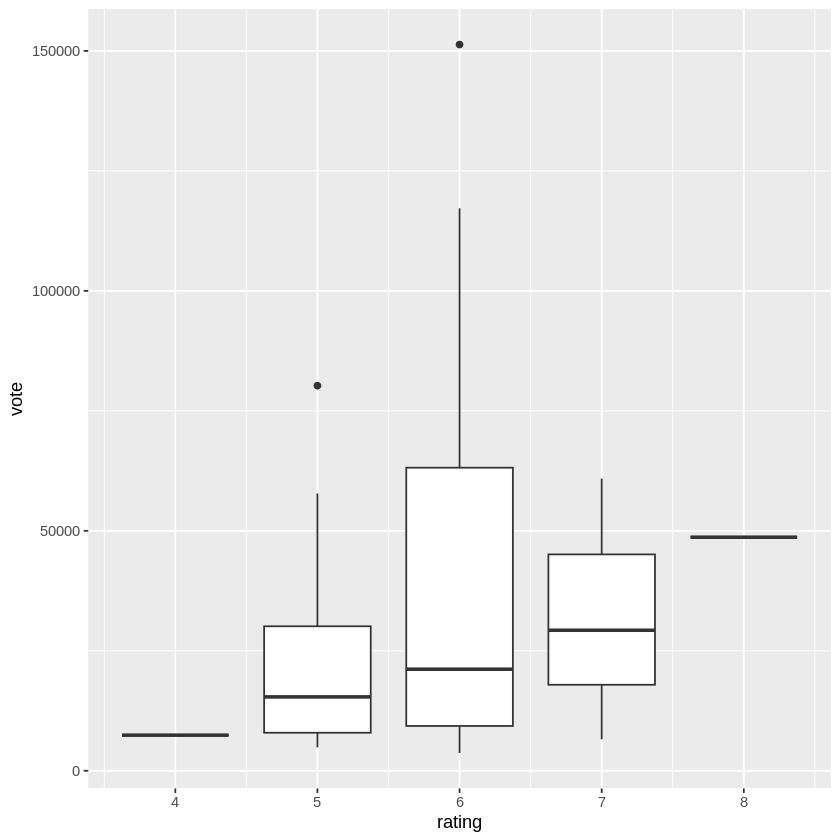

In [ ]:
# Creating a boxplot that show the number of vote again the user rating
ggplot(data = movie_df,
       aes(x = rating, y = vote, group = rating)) +
  geom_boxplot()

As we can see from the graph, as the number of votes increase so does the user rating.